In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import sem
from sklearn.datasets import make_classification



In [4]:
## Loading the dataset stroke_data.csv
S_data = pd.read_csv('D:\DWNLD\stroke_data.csv')
S_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


:::::::::::::::::::::::::::::::::::::::::::::::: EXPLORATORY DATA ANALYSIS ::::::::::::::::::::::::::::::::::::::::::::::::

In [5]:
## Checking for null values, description of the dataset
S_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We can observe that 'bmi' has got null values with 4909 non-null values in the column

In [6]:
S_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


1. We can observe that 'age' has a wide range of values from 0.08 to 82 with the mean almost twice the standard deviation 
2. The column 'hypertension' has a significantly low mean at 0.097 while its range is from 0 to 1 and from this we can infer that there are very low number of cases in the dataset where patients have hypertension
3. We can make the same obervation about 'heart_disease' where the mean is significantly low at 0.05 indicating low number of records where patients have had heart disease
4. 'avg_glucose_level' shows that 75% of records are at 114.09 which is pre-diabetic or considered within the borderline range but the last quadrant of records possibly in unhealthy range 
5. 'bmi' shows a similar level with 75% of records are within the healthy range with the upper quadrant of records in the unhealthy range
6. 'stoke' has a low mean of 0.048 which indicates a low number of records where stoke was recorded
7. We can also observe that the remaining variables are categorical which will need to be transformed to numerical values when performing feature engineering.

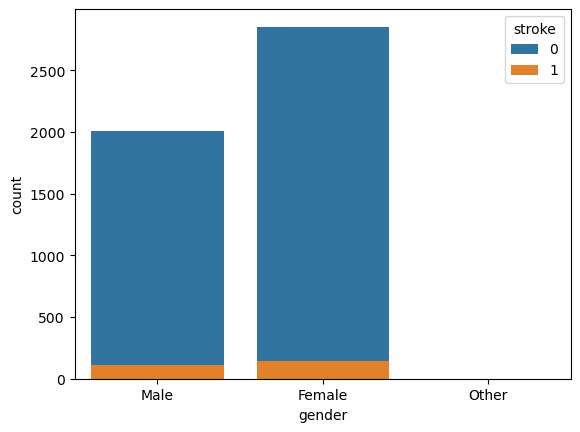

In [7]:
## Checking if gender is an indication of stroke
sns.countplot(data=S_data,x='gender',hue='stroke', dodge=False)
plt.show()

There is no clear indication that gender is a good predictor of stroke. 

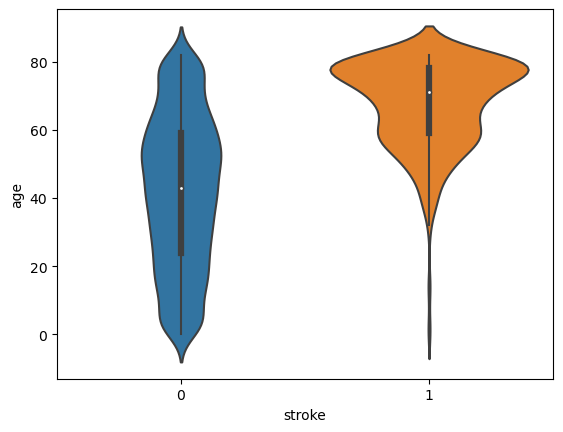

In [8]:
## Checking the representation of age in relation to instances of stroke in the dataset
sns.violinplot(x='stroke', y='age', data=S_data)
plt.show()

We can observe that the instances of stroke (stroke = 1)significantly rise with age in our dataset indicating that age is a significant feature in predicting stroke

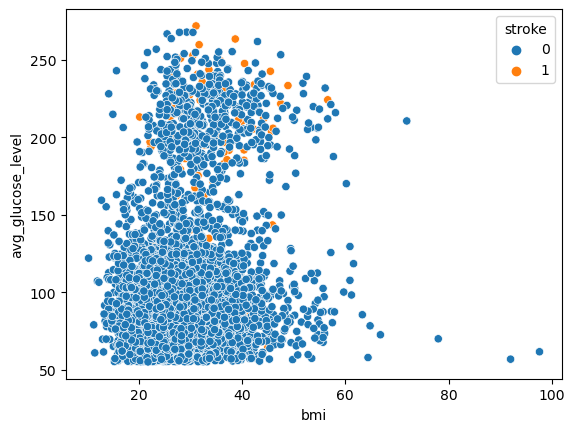

In [9]:
## Checking the relation between 'avg_glucose_level' and 'bmi' showing instances of stroke
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='stroke', data=S_data)
plt.show()

We can observe that cases with high 'avg_glucose_level' shows higher number of instances of stroke whereas high 'bmi' does not  indicate more instances of stroke in the dataset

heart_disease    0   1
hypertension          
0              149  34
1               53  13


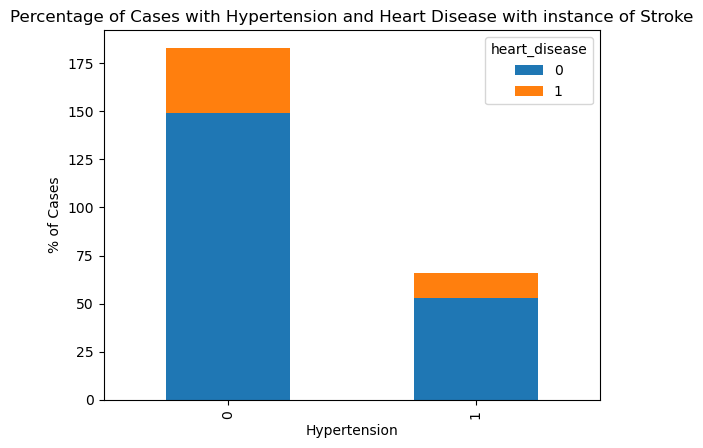

In [10]:
## Pivot the percentage of instances with hypertension, heart disease vs records showing stroke
hyp_hd = S_data.pivot_table(index='hypertension', columns='heart_disease', values='stroke', aggfunc='sum')
print(hyp_hd)

## Plot the pivot table
hyp_hd.plot(kind='bar', stacked = True)
plt.xlabel('Hypertension')
plt.ylabel('% of Cases')
plt.title('Percentage of Cases with Hypertension and Heart Disease with instance of Stroke')
plt.show()

There are 249 records in the dataset with instances of stroke, out of this 149 records (60%) did not have hypertension or heart disease but there are 100 cases (40%) where stroke victims had either hypertension or heart disease. This is not a very clear indicator but could be used in combination with others as a feature.

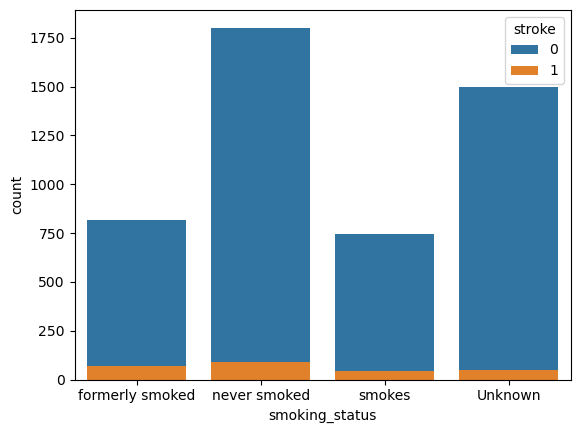

In [11]:
## Describing the relationship between smoking status with instances of stroke

sns.countplot(data=S_data,x='smoking_status',hue='stroke', dodge=False)
plt.show()

There is no clear indication if smoking status causes stroke as per the above chart. 

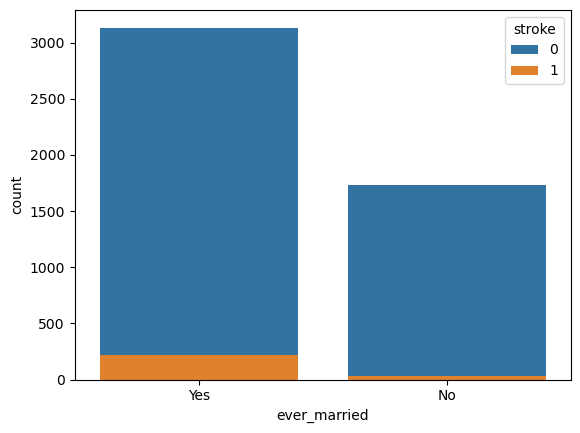

In [12]:
## Checking if ever_married is an indication of stroke
sns.countplot(data=S_data,x='ever_married',hue='stroke', dodge=False)
plt.show()

We can observe that there are higher number of cases when ever_married is 'Yes' that has resulted in stroke. 

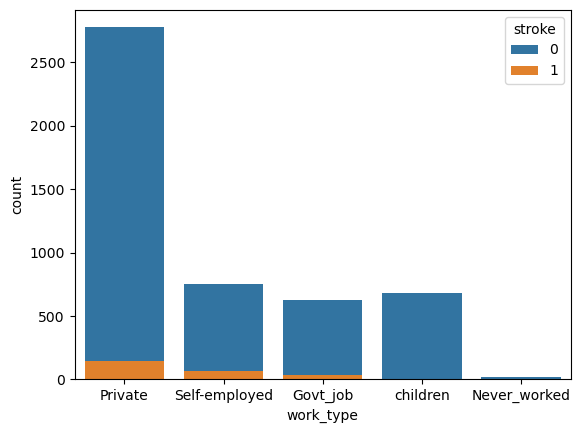

In [13]:
## Checking the relation between work type and instances of stroke
sns.countplot(data=S_data,x='work_type',hue='stroke', dodge=False)
plt.show()

We can make the observation that records with work status as "Private" shows a higher number of stroke cases Vs "Never_worked" or "Children. This indicates that work type could be a good indicator of predicting stroke.

:::::::::::::::::::::::::::::::::::::::::::::::: FEATURE ENGINEERING ::::::::::::::::::::::::::::::::::::::::::::::::

In [14]:
S_data.drop("id",inplace=True,axis=1)

Dropping ID's from the data set as this is not required for modeling  

In [15]:
# label Encodeing - Manually to transform the categorical variables to numerical values

S_data['hypertension_L'] = S_data['hypertension'].replace({0 : 'No', 1: 'Yes'})

S_data['heart_disease_L'] = S_data['heart_disease'].replace({0 : 'No', 1: 'Yes'})

S_data['stroke_L'] = S_data['stroke'].replace({0 : 'No', 1: 'Yes'})

S_data['gender_L'] = S_data['gender'].replace({'Female' : 1, 'Male': 2, 'Other': 3})

S_data['ever_married_L'] = S_data['ever_married'].replace({'No' : 0, 'Yes': 1})

S_data['work_type'].value_counts()

S_data['work_type_L'] = S_data['work_type'].replace({
'Private' : 2,
'Self-employed' : 2,
'children' : 1,
'Govt_job' : 3,
'Never_worked' : 1})

S_data['Residence_type_L'] = S_data['Residence_type'].replace({'Urban' : 2, 'Rural' : 1})


S_data['smoking_status'].value_counts()

S_data['smoking_status_L'] = S_data['smoking_status'].replace({
'never smoked': 1,
'Unknown': 0,
'formerly smoked': 2,
'smokes': 3})


In [16]:
## Dropping the NA's from bmi 
df = S_data[S_data['bmi'].notna()]

:::::::::::::::::::::::::::::::::::::::::::::::: FEATURE SELECTION ::::::::::::::::::::::::::::::::::::::::::::::::

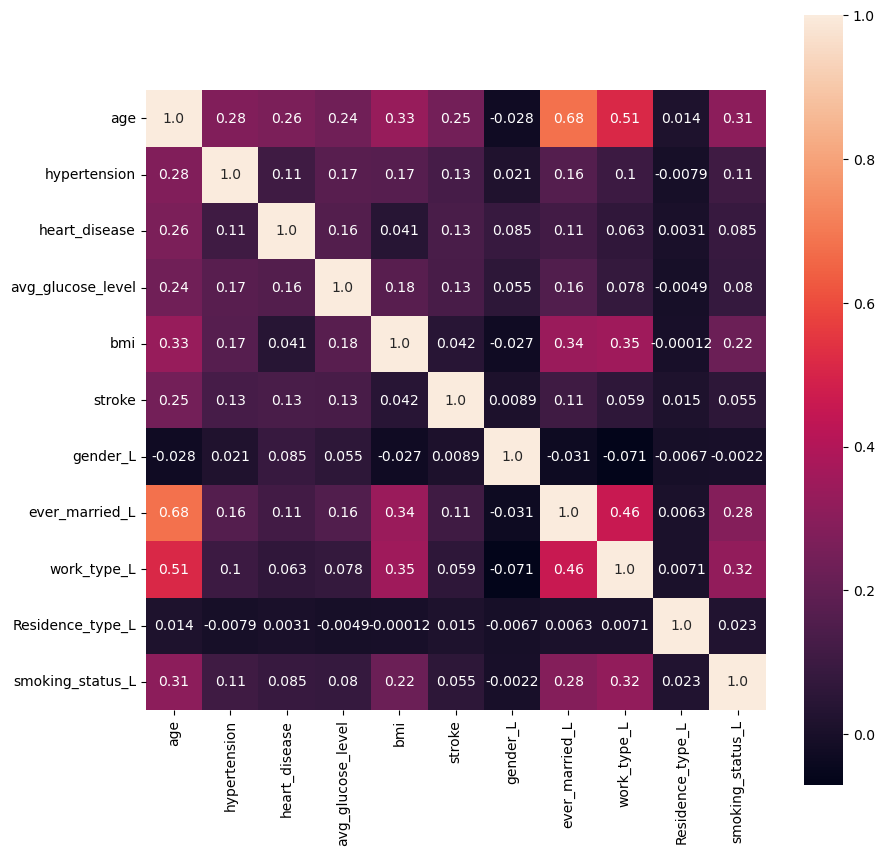

In [18]:
# Correlation matrix to select variables with highest correlation against stroke
corr = S_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square = True, fmt='.2')
plt.show()


Based on the above chart, we can observe that the variables that have the highest correlation with 'stroke' are 'age', 'hypertension', 'heart_disease', 'ever_married' and 'avg_glucose_level'

In [19]:
select_col = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level','ever_married_L']


:::::::::::::::::::::::::::::::::::::::::::::::: MODEL TRAINING ::::::::::::::::::::::::::::::::::::::::::::::::

In [20]:
# Split the data into features and target

##train_x,test_x,train_y,test_y=train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)

X = S_data[select_col]
y = S_data["stroke"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.4,random_state =123)

# checking the shape of the training and testing sets
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3066, 5), (2044, 5), (3066,), (2044,))

In [21]:
# Feature Scaling is required to normalize the feature values 
# since there is a high degree of range in age and avg_glucose_level
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# First Modeling approach is to Train a simplistic Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Making the Confusion Matrix to assess the model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[1951    0]
 [  93    0]]


0.9545009784735812

We can observe that eventhough the model has an accuracy score of 95% the number of False Negatives is high at 93 and True Negatives did not predict any cases at 0. Hence this modeling approach is not the best for this dataset. I have tried to tweak the hyperparameters to get better results but unfortunately this has not given any major variations in the True Negatives.

In [23]:
# Second modeling approach is to Train the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0)
classifier.fit(X_train, y_train)

# Making the Confusion Matrix
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))


Accuracy: 0.9545009784735812
Confusion Matrix: [[1951    0]
 [  93    0]]


We can observe a similar result while adopting a Random Forest modelling approach with False Negatives high at 93 and True Negatives showing 0 cases. Eventhough the model accuracy is 95%. We can make a clear observation that this is due to the dataset being imbalanced with less than 5% of the cases in the data with stroke and more than 95% with no stroke in the dataset. 

In [24]:
# Third modeling approach is to Train the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[1728  223]
 [  54   39]]


0.8644814090019569

We can observe that eventhough the model accuracy score is a bit lower at 86.44%, the True Negatives are showing a larger number of predictions at 39. But False Positives and False Negatives are also higher. 


:::::::::::::::::::::::::::::::::::::::::::::::: MODEL EVALUATION ::::::::::::::::::::::::::::::::::::::::::::::::


|Model#	|Approach	|Accuracy	|True Positives	|True Negatives	|False Positives	|False Negatives|


|1	|Logistic Regression	|0.9545	|1951	|0	|93	|0  |

|2	|Random Forest	|0.9545	|1951	|0	|93	|0  |

|3	|Naive Bayes	|0.8644	|1728	|39	|54	|223|


Given the imbalanced dataset and after several attempts at trying different features, I feel that the Naive Bayes model is the best option for this project. The accuracy could possibly be further improved if I have a more indepth knowledge of the naive bayes approach which at this stage, I do not posses. 


I hope that I was able to explain my approach and observations in a clear and simplistic way. Thank you for taking time to review my work. I look forward to gaining a more indepth knowledge of the various modeling approaches in my future classes.